In [19]:
import pandas as pd
import sqlite3

In [20]:
# Step 1: Extract - Load data from CSV
df = pd.read_csv("/content/insurance.csv")
#Dataset source from Kaggle:
#(https://www.kaggle.com/datasets/samialyasin/insurance-data-personal-auto-line-of-business?resource=download)

In [21]:
# Step 2: Transform - Handle missing values
df.dropna(inplace=True)

# Convert categorical columns to numerical values
df['Marital_Status'] = df['Marital_Status'].map({'Single': 0, 'Married': 1})
df['Policy_Type'] = df['Policy_Type'].map({'Full Coverage': 1, 'Liability-Only': 0})
df['Claims_Severity'] = df['Claims_Severity'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Creating a new feature: Risk Level
df['Risk_Level'] = df['Claims_Frequency'] * df['Claims_Severity']

In [22]:
# Step 3: Load - Save cleaned data to SQLite database
conn = sqlite3.connect("insurance_data.db")
df.to_sql("insurance_policies", conn, if_exists="replace", index=False)
conn.close()

print("ETL process completed successfully!")

ETL process completed successfully!


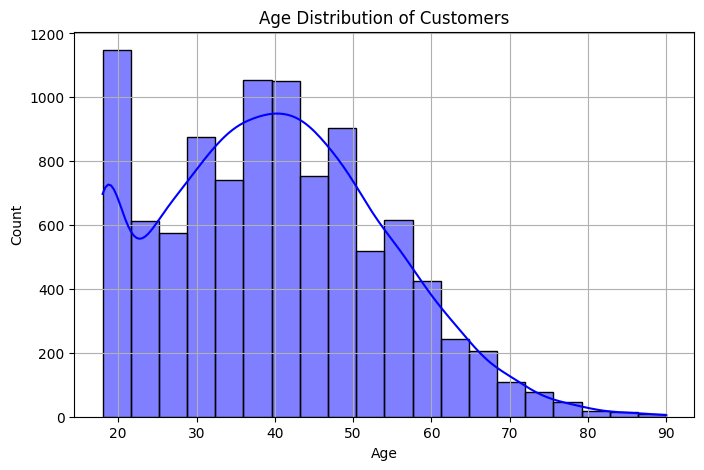

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv("insurance.csv")

# 1. Histogram - Phân bố tuổi khách hàng
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()

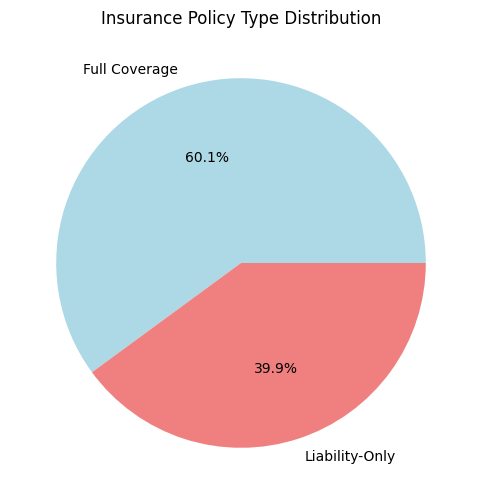

In [24]:
# 2. Pie Chart - Tỷ lệ loại bảo hiểm
plt.figure(figsize=(6, 6))
df['Policy_Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Insurance Policy Type Distribution")
plt.ylabel("")
plt.show()

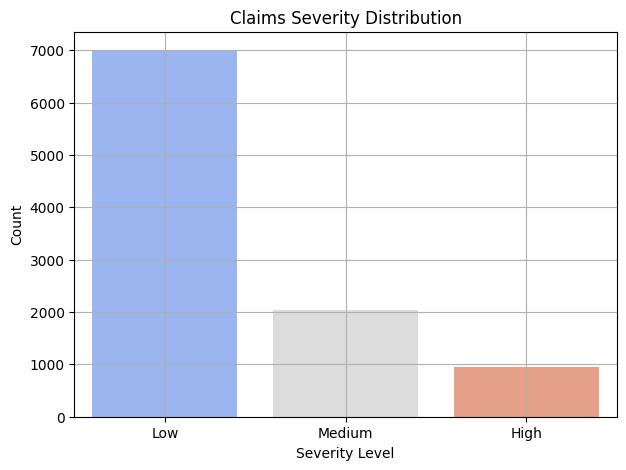

In [25]:
# 3. Bar Chart - Mức độ nghiêm trọng của yêu cầu bảo hiểm
plt.figure(figsize=(7, 5))
sns.countplot(x=df['Claims_Severity'], hue=df['Claims_Severity'], palette='coolwarm', legend=False)
plt.title("Claims Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.grid(True)
plt.show()


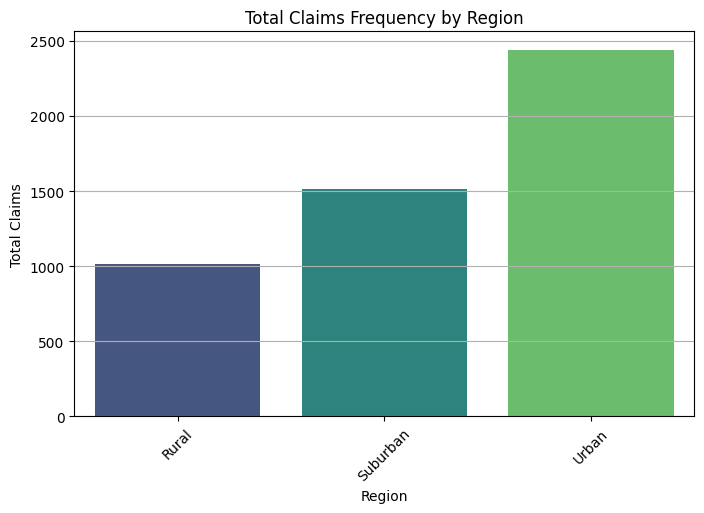

In [26]:
# 4. Bar Chart - Tổng số lần yêu cầu bảo hiểm theo khu vực
region_claims = df.groupby("Region")['Claims_Frequency'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Claims_Frequency', hue='Region', data=region_claims, palette='viridis', legend=False)
plt.title("Total Claims Frequency by Region")
plt.xlabel("Region")
plt.ylabel("Total Claims")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


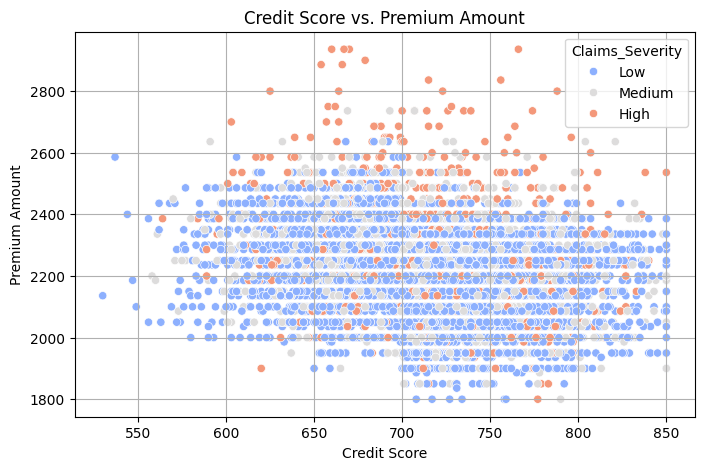

In [27]:
# 5. Scatter Plot - Mối quan hệ giữa điểm tín dụng và phí bảo hiểm
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Credit_Score'], y=df['Premium_Amount'], hue=df['Claims_Severity'], palette='coolwarm')
plt.title("Credit Score vs. Premium Amount")
plt.xlabel("Credit Score")
plt.ylabel("Premium Amount")
plt.grid(True)
plt.show()